   <h2><center>Iteration 4 - BDAS</center></h2>
   <center>Ying BO (UPI: ybo473)</center>

## 2. Data Preparation

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_BDAS_ybo473').getOrCreate()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1. Initial Data Collection

### 2.2. Data Description

In [3]:
data = pd.read_csv("./CHARLS_2011.csv", index_col = "ID")

In [4]:
data_spark = spark.createDataFrame(data)

rows_num = data_spark.count()
columns_num = len(data_spark.columns)
print("sample: " + str(rows_num) )
print("variables: "+ str(columns_num) )

sample: 7337
variables: 35


In [5]:
data_spark.printSchema()

root
 |-- Edu: double (nullable = true)
 |-- Marriage: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- Hypertension: double (nullable = true)
 |-- Dyslipidemia: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- Cancer/Tumor: double (nullable = true)
 |-- ChronicLungDiseases: double (nullable = true)
 |-- LiverDisease: double (nullable = true)
 |-- HeartProblems: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- KidneyDisease: double (nullable = true)
 |-- DigestiveDisease: double (nullable = true)
 |-- PsychiatricProblems: double (nullable = true)
 |-- Memory-RelatedDisease: double (nullable = true)
 |-- ArthritisorRheumatism: double (nullable = true)
 |-- Asthma: double (nullable = true)
 |-- Hospital: double (nullable = true)
 |-- HospitalFreq: double (nullable = true)
 |-- HosptialExpense: double (nullable = true)
 |-- Job: double (nullable = true)
 |-- Pension: double (nullable = true)
 |-- Rural: double (nullable = true)
 |

In [6]:
data_spark.columns

['Edu',
 'Marriage',
 'Gender',
 'Hypertension',
 'Dyslipidemia',
 'Diabetes',
 'Cancer/Tumor',
 'ChronicLungDiseases',
 'LiverDisease',
 'HeartProblems',
 'Stroke',
 'KidneyDisease',
 'DigestiveDisease',
 'PsychiatricProblems',
 'Memory-RelatedDisease',
 'ArthritisorRheumatism',
 'Asthma',
 'Hospital',
 'HospitalFreq',
 'HosptialExpense',
 'Job',
 'Pension',
 'Rural',
 'Age',
 'HouseholdIncome',
 'IncomePer',
 'Self-assessedHealth',
 'PADL',
 'IADL',
 'MentalHealth',
 'ChildrenNum',
 'Colive',
 'Province',
 'ClinicFreq',
 'medtc']

In [7]:
data_spark.head()

Row(Edu=1.0, Marriage=1.0, Gender=1.0, Hypertension=0.0, Dyslipidemia=0.0, Diabetes=1.0, Cancer/Tumor=0.0, ChronicLungDiseases=0.0, LiverDisease=0.0, HeartProblems=0.0, Stroke=0.0, KidneyDisease=0.0, DigestiveDisease=0.0, PsychiatricProblems=0.0, Memory-RelatedDisease=0.0, ArthritisorRheumatism=1.0, Asthma=0.0, Hospital=0.0, HospitalFreq=0.0, HosptialExpense=nan, Job=0.0, Pension=0.0, Rural=1.0, Age=66.0, HouseholdIncome=5000, IncomePer=833.0, Self-assessedHealth=0.0, PADL=6, IADL=5, MentalHealth=12.0, ChildrenNum=1, Colive=1, Province=2, ClinicFreq=0.0, medtc=0)

### 2.3. Data Exploration

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Edu,7308.0,0.823892,0.728165,0.0,0.0,1.0,1.0,2.0
Marriage,7320.0,0.792760,0.405357,0.0,1.0,1.0,1.0,1.0
Gender,7332.0,0.497545,0.500028,0.0,0.0,0.0,1.0,1.0
Hypertension,7253.0,0.324831,0.468344,0.0,0.0,0.0,1.0,1.0
Dyslipidemia,7152.0,0.106404,0.308375,0.0,0.0,0.0,0.0,1.0
Diabetes,7228.0,0.071112,0.257030,0.0,0.0,0.0,0.0,1.0
Cancer/Tumor,7248.0,0.009934,0.099179,0.0,0.0,0.0,0.0,1.0
ChronicLungDiseases,7257.0,0.141519,0.348580,0.0,0.0,0.0,0.0,1.0
LiverDisease,7235.0,0.040083,0.196167,0.0,0.0,0.0,0.0,1.0
HeartProblems,7242.0,0.161281,0.367816,0.0,0.0,0.0,0.0,1.0


(array([4897.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2356.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

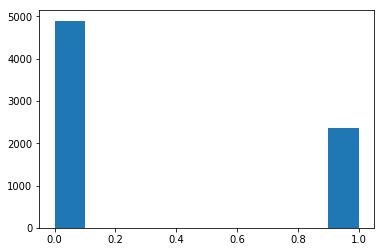

In [9]:
plt.hist(data[data["Hypertension"] >= 0]["Hypertension"])

In [10]:
print(data.std(axis=0))

Edu                          0.728165
Marriage                     0.405357
Gender                       0.500028
Hypertension                 0.468344
Dyslipidemia                 0.308375
Diabetes                     0.257030
Cancer/Tumor                 0.099179
ChronicLungDiseases          0.348580
LiverDisease                 0.196167
HeartProblems                0.367816
Stroke                       0.191812
KidneyDisease                0.250116
DigestiveDisease             0.417018
PsychiatricProblems          0.128115
Memory-RelatedDisease        0.168777
ArthritisorRheumatism        0.483637
Asthma                       0.227106
Hospital                     0.328130
HospitalFreq                 0.614542
HosptialExpense          13540.282362
Job                          0.429618
Pension                      0.377663
Rural                        0.423604
Age                          6.924902
HouseholdIncome          29952.452633
IncomePer                 5509.301552
Self-assesse

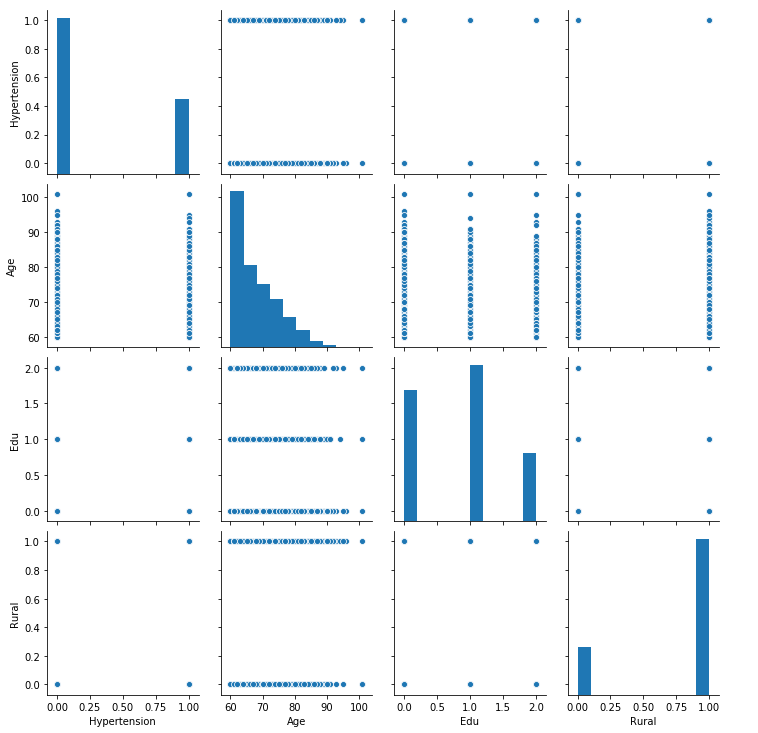

In [11]:
data1 = data.loc[:,["Hypertension","Age","Edu","Rural"]]
sns.pairplot(data1)

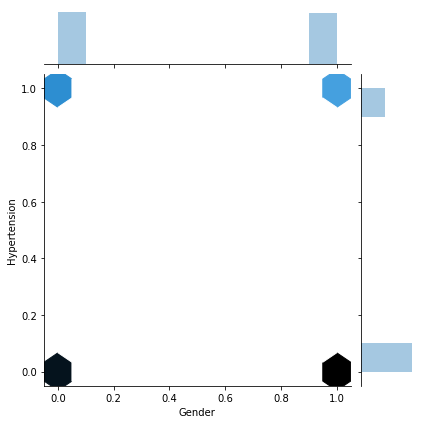

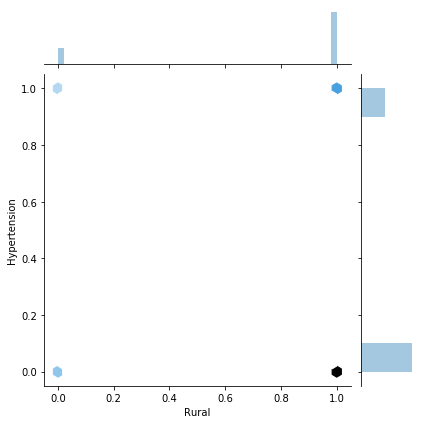

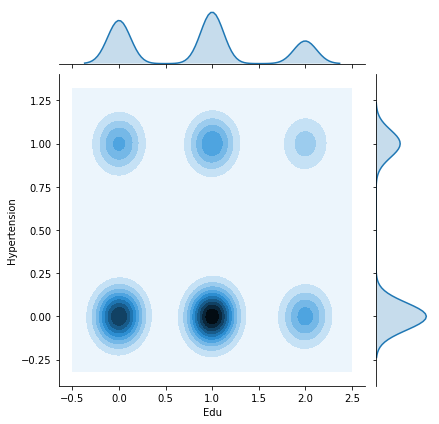

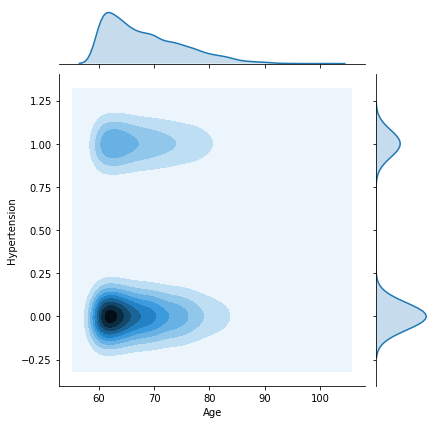

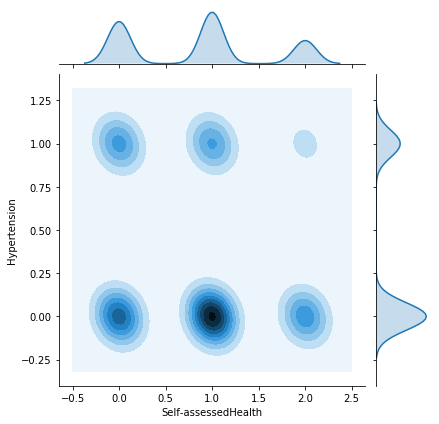

In [12]:
data1 = data.loc[:,["Hypertension","Age","Edu","Rural","Gender","Self-assessedHealth"]]
sns.jointplot(y="Hypertension", x="Gender", data=data1, kind='hex')
sns.jointplot(y="Hypertension", x="Rural", data=data1, kind='hex')
sns.jointplot(y="Hypertension", x="Edu", data=data1, kind='kde')
sns.jointplot(y="Hypertension", x="Age", data=data1, kind='kde')
sns.jointplot(y="Hypertension", x="Self-assessedHealth", data=data1, kind='kde')

### 2.4. Data Quality Varification

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7337 entries, 10104117002.0 to 348000000000.0
Data columns (total 35 columns):
Edu                      7308 non-null float64
Marriage                 7320 non-null float64
Gender                   7332 non-null float64
Hypertension             7253 non-null float64
Dyslipidemia             7152 non-null float64
Diabetes                 7228 non-null float64
Cancer/Tumor             7248 non-null float64
ChronicLungDiseases      7257 non-null float64
LiverDisease             7235 non-null float64
HeartProblems            7242 non-null float64
Stroke                   7268 non-null float64
KidneyDisease            7234 non-null float64
DigestiveDisease         7269 non-null float64
PsychiatricProblems      7250 non-null float64
Memory-RelatedDisease    7259 non-null float64
ArthritisorRheumatism    7268 non-null float64
Asthma                   7260 non-null float64
Hospital                 7269 non-null float64
HospitalFreq           

In [14]:
# missing values of the data
data.isnull().sum()

Edu                        29
Marriage                   17
Gender                      5
Hypertension               84
Dyslipidemia              185
Diabetes                  109
Cancer/Tumor               89
ChronicLungDiseases        80
LiverDisease              102
HeartProblems              95
Stroke                     69
KidneyDisease             103
DigestiveDisease           68
PsychiatricProblems        87
Memory-RelatedDisease      78
ArthritisorRheumatism      69
Asthma                     77
Hospital                   68
HospitalFreq                1
HosptialExpense          6498
Job                       706
Pension                    82
Rural                       1
Age                        48
HouseholdIncome             0
IncomePer                   3
Self-assessedHealth        48
PADL                        0
IADL                        0
MentalHealth              613
ChildrenNum                 0
Colive                      0
Province                    0
ClinicFreq

In [15]:
# checking for extreme values
data.describe([0.01,.99,.995]).T

,count,mean,std,min,1%,50%,99%,99.5%,max
Edu,7308.0,0.823892,0.728165,0.0,0.0,1.0,2.0,2.0,2.0
Marriage,7320.0,0.792760,0.405357,0.0,0.0,1.0,1.0,1.0,1.0
Gender,7332.0,0.497545,0.500028,0.0,0.0,0.0,1.0,1.0,1.0
Hypertension,7253.0,0.324831,0.468344,0.0,0.0,0.0,1.0,1.0,1.0
Dyslipidemia,7152.0,0.106404,0.308375,0.0,0.0,0.0,1.0,1.0,1.0
Diabetes,7228.0,0.071112,0.257030,0.0,0.0,0.0,1.0,1.0,1.0
Cancer/Tumor,7248.0,0.009934,0.099179,0.0,0.0,0.0,0.0,1.0,1.0
ChronicLungDiseases,7257.0,0.141519,0.348580,0.0,0.0,0.0,1.0,1.0,1.0
LiverDisease,7235.0,0.040083,0.196167,0.0,0.0,0.0,1.0,1.0,1.0
HeartProblems,7242.0,0.161281,0.367816,0.0,0.0,0.0,1.0,1.0,1.0


## 3. Data Preparation

### 3.1. Data Selection

In [16]:
# First, we have to register the DataFrame as a SQL temporary view.
data_spark.createOrReplaceTempView('data_spark')

In [17]:
# After that, we can use the SQL programming language for queries.
# subset of lower-aged elderly
lower_aged = spark.sql("SELECT * FROM data_spark WHERE Age >= 60 AND Age < 80")
lower_aged.select('age').describe().show()

+-------+----------------+
|summary|             age|
+-------+----------------+
|  count|            6697|
|   mean|  66.96237121099|
| stddev|5.39066017076186|
|    min|            60.0|
|    max|            79.0|
+-------+----------------+



In [18]:
# subset of higher-aged elderly
higher_aged = spark.sql("SELECT * FROM data_spark WHERE Age >= 80")
higher_aged.select('age').describe().show()

+-------+----+
|summary| age|
+-------+----+
|  count| 640|
|   mean| NaN|
| stddev| NaN|
|    min|80.0|
|    max| NaN|
+-------+----+



(array([390.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 220.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

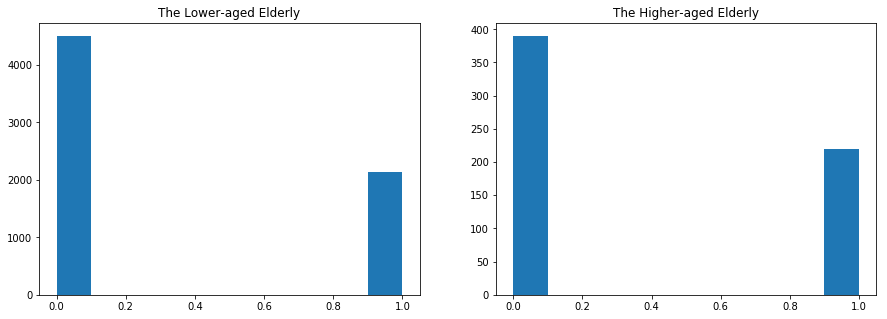

In [19]:
# visualization: 
# different distribution of hypertension between lower-aged and higher-aged elderly
lower_aged = lower_aged.toPandas()
higher_aged = higher_aged.toPandas()
plt.figure(1, figsize = (15,5))
plt.subplot(121)
plt.title("The Lower-aged Elderly")
plt.hist(lower_aged[lower_aged["Hypertension"] >= 0]["Hypertension"])
plt.subplot(122)
plt.title("The Higher-aged Elderly")
plt.hist(higher_aged[higher_aged["Hypertension"] >= 0]["Hypertension"])

In [20]:
# subset of rural elderly
rural = spark.sql("SELECT * FROM data_spark WHERE Rural == 1")
rural.select('rural').describe().show()

+-------+-----+
|summary|rural|
+-------+-----+
|  count| 5617|
|   mean|  1.0|
| stddev|  0.0|
|    min|  1.0|
|    max|  1.0|
+-------+-----+



In [21]:
# subset of urban elderly
urban = spark.sql("SELECT * FROM data_spark WHERE Rural == 0")
urban.select('rural').describe().show()

+-------+-----+
|summary|rural|
+-------+-----+
|  count| 1719|
|   mean|  0.0|
| stddev|  0.0|
|    min|  0.0|
|    max|  0.0|
+-------+-----+



(array([995.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 697.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

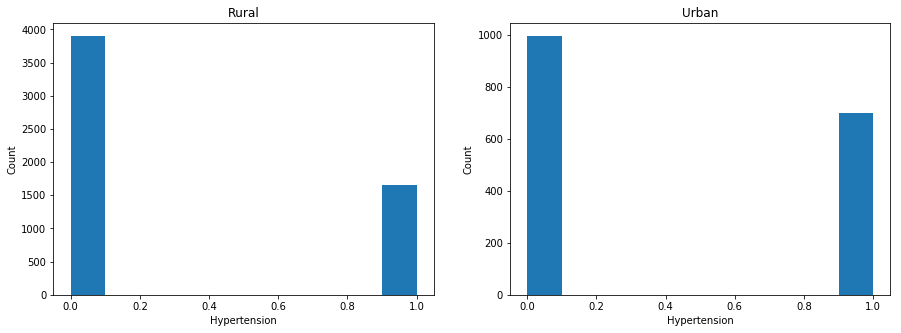

In [22]:
#Visualization: 
#different distribution of hypertension between rural and urban elderly
rural = rural.toPandas()
urban = urban.toPandas()
plt.figure(1, figsize = (15,5))
plt.subplot(121)
plt.title("Rural")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.hist(rural[rural["Hypertension"] >= 0]["Hypertension"])
plt.subplot(122)
plt.title("Urban")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.hist(urban[urban["Hypertension"] >= 0]["Hypertension"])

### 3.2. Data Cleaning

In [23]:
from pyspark.sql.functions import when
import pyspark.sql.functions as F

# calculate means of different columns
def mean_of_pyspark_columns(data_spark, numeric_cols):
    col_with_mean = []
    for col in numeric_cols:
        mean_value = df.select(F.avg(data_spark[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row: row[avg_col]).collect()
        col_with_mean.append([col, res[0]])
    return col_with_mean

# fill null value with means
def fill_missing_with_mean(data_spark, numeric_cols):
    col_with_mean = mean_of_pyspark_columns(data_spark, numeric_cols)
    for col, mean in col_with_mean:
        data_spark = data_spark.withColumn(col, 
                      when(data_spark[col].isNull() == True, 
                      F.lit(mean)).otherwise(data_spark[col]))
    return data_spark

In [24]:
# missing values of the data
for col in data_spark.columns:
    print(col,": ", 
          data_spark.filter(data_spark[col].isNull()).count())

Edu :  0
Marriage :  0
Gender :  0
Hypertension :  0
Dyslipidemia :  0
Diabetes :  0
Cancer/Tumor :  0
ChronicLungDiseases :  0
LiverDisease :  0
HeartProblems :  0
Stroke :  0
KidneyDisease :  0
DigestiveDisease :  0
PsychiatricProblems :  0
Memory-RelatedDisease :  0
ArthritisorRheumatism :  0
Asthma :  0
Hospital :  0
HospitalFreq :  0
HosptialExpense :  0
Job :  0
Pension :  0
Rural :  0
Age :  0
HouseholdIncome :  0
IncomePer :  0
Self-assessedHealth :  0
PADL :  0
IADL :  0
MentalHealth :  0
ChildrenNum :  0
Colive :  0
Province :  0
ClinicFreq :  0
medtc :  0


In [25]:
# treatment of null values
data.loc[:,"HosptialExpense"] = data.loc[:,"HosptialExpense"].fillna(0)
data.loc[:,"Edu"] = data.loc[:,"Edu"].fillna(data.loc[:,"Edu"].median())
data.loc[:,"Marriage"] = data.loc[:,"Marriage"].fillna(data.loc[:,"Marriage"].median())
data.loc[:,"Gender"] = data.loc[:,"Gender"].fillna(data.loc[:,"Gender"].median())
data.loc[:,"Hypertension"] = data.loc[:,"Hypertension"].fillna(data.loc[:,"Hypertension"].median())
data.loc[:,"Dyslipidemia"] = data.loc[:,"Dyslipidemia"].fillna(data.loc[:,"Dyslipidemia"].median())
data.loc[:,"Diabetes"] = data.loc[:,"Diabetes"].fillna(data.loc[:,"Diabetes"].median())
data.loc[:,"Cancer/Tumor"] = data.loc[:,"Cancer/Tumor"].fillna(data.loc[:,"Cancer/Tumor"].median())
data.loc[:,"ChronicLungDiseases"] = data.loc[:,"ChronicLungDiseases"].fillna(data.loc[:,"ChronicLungDiseases"].median())
data.loc[:,"LiverDisease"] = data.loc[:,"LiverDisease"].fillna(data.loc[:,"LiverDisease"].median())
data.loc[:,"HeartProblems"] = data.loc[:,"HeartProblems"].fillna(data.loc[:,"HeartProblems"].median())
data.loc[:,"Stroke"] = data.loc[:,"Stroke"].fillna(data.loc[:,"Stroke"].median())
data.loc[:,"KidneyDisease"] = data.loc[:,"KidneyDisease"].fillna(data.loc[:,"KidneyDisease"].median())
data.loc[:,"DigestiveDisease"] = data.loc[:,"DigestiveDisease"].fillna(data.loc[:,"DigestiveDisease"].median())
data.loc[:,"PsychiatricProblems"] = data.loc[:,"PsychiatricProblems"].fillna(data.loc[:,"PsychiatricProblems"].median())
data.loc[:,"Memory-RelatedDisease"] = data.loc[:,"Memory-RelatedDisease"].fillna(data.loc[:,"Memory-RelatedDisease"].median())
data.loc[:,"ArthritisorRheumatism"] = data.loc[:,"ArthritisorRheumatism"].fillna(data.loc[:,"ArthritisorRheumatism"].median())
data.loc[:,"Asthma"] = data.loc[:,"Asthma"].fillna(data.loc[:,"Asthma"].median())
data.loc[:,"Hospital"] = data.loc[:,"Hospital"].fillna(data.loc[:,"Hospital"].median())
data.loc[:,"HospitalFreq"] = data.loc[:,"HospitalFreq"].fillna(data.loc[:,"HospitalFreq"].median())
data.loc[:,"Job"] = data.loc[:,"Job"].fillna(data.loc[:,"Job"].median())
data.loc[:,"Pension"] = data.loc[:,"Pension"].fillna(data.loc[:,"Pension"].median())
data.loc[:,"Rural"] = data.loc[:,"Rural"].fillna(data.loc[:,"Rural"].median())
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
data.loc[:,"IncomePer"] = data.loc[:,"IncomePer"].fillna(data.loc[:,"IncomePer"].median())
data.loc[:,"Self-assessedHealth"] = data.loc[:,"Self-assessedHealth"].fillna(data.loc[:,"Self-assessedHealth"].median())
data.loc[:,"MentalHealth"] = data.loc[:,"MentalHealth"].fillna(data.loc[:,"MentalHealth"].median())
data.loc[:,"ClinicFreq"] = data.loc[:,"ClinicFreq"].fillna(data.loc[:,"ClinicFreq"].median())

In [26]:
# drop duplicates
data.drop_duplicates(inplace=True) 
data.shape

(7334, 35)

(array([3.943e+03, 1.340e+02, 2.700e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00]),
 array([1.00000e+01, 7.44090e+04, 1.48808e+05, 2.23207e+05, 2.97606e+05,
        3.72005e+05, 4.46404e+05, 5.20803e+05, 5.95202e+05, 6.69601e+05,
        7.44000e+05]),
 <a list of 10 Patch objects>)

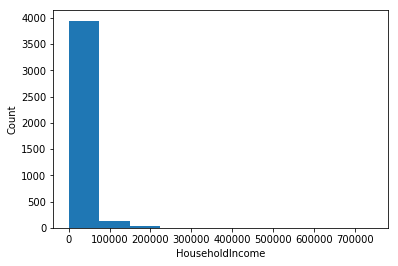

In [27]:
# treatment of extremes values
# distribution before extreme treatment
plt.xlabel("HouseholdIncome")
plt.ylabel("Count")
plt.hist(data[data["HouseholdIncome"] > 0]["HouseholdIncome"])

In [28]:
# drop the extreme values for variable HouseholdIncome
data_spark = spark.sql("SELECT * FROM data_spark WHERE HouseholdIncome <= 154792")
data_spark.select('HouseholdIncome').describe().show()

+-------+------------------+
|summary|   HouseholdIncome|
+-------+------------------+
|  count|              7300|
|   mean|10125.158630136986|
| stddev|19299.224016275904|
|    min|                 0|
|    max|            153000|
+-------+------------------+



In [29]:
# drop the extreme values for variable IncomePer
data_spark = spark.sql("SELECT * FROM data_spark WHERE IncomePer <= 32000.0")
data_spark.select('IncomePer').describe().show()


+-------+------------------+
|summary|         IncomePer|
+-------+------------------+
|  count|              7300|
|   mean| 2277.976575342466|
| stddev|3952.3868107747035|
|    min|               0.0|
|    max|           32000.0|
+-------+------------------+



In [30]:
data_ = data_spark.toPandas()
data_[["HouseholdIncome","IncomePer"]].describe([0.01,.99,.999]).T

,count,mean,std,min,1%,50%,99%,99.9%,max
HouseholdIncome,7300.0,10323.627945,20495.897863,0.0,0.0,1000.0,96000.0,173000.0,259200.0
IncomePer,7300.0,2277.976575,3952.386811,0.0,0.0,400.0,17600.0,30400.0,32000.0


(array([2572.,  704.,  343.,  243.,   83.,   49.,   44.,   15.,   11.,
           7.]),
 array([1.00000e+01, 1.53090e+04, 3.06080e+04, 4.59070e+04, 6.12060e+04,
        7.65050e+04, 9.18040e+04, 1.07103e+05, 1.22402e+05, 1.37701e+05,
        1.53000e+05]),
 <a list of 10 Patch objects>)

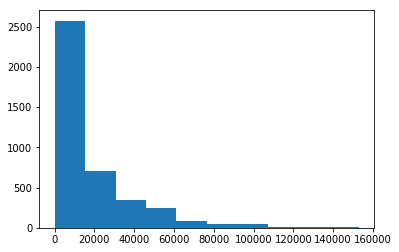

In [31]:
# drop the extreme values for variable HouseholdIncome
data = data[data.loc[:,"HouseholdIncome"] <= 154792]
data.shape

# drop the extreme values for variable IncomePer
data = data[data.loc[:,"IncomePer"] <= 32000.0]
data.shape
plt.hist(data[data["HouseholdIncome"] > 0]["HouseholdIncome"])

### 3.3. Data Construction

In [32]:
# deriving of new variable ADL
data["ADL"] = data["PADL"] + data["IADL"]
data.shape

(7286, 36)

In [33]:
print(data[["ADL", "PADL","IADL"]].describe())

               ADL         PADL         IADL
count  7286.000000  7286.000000  7286.000000
mean     13.420258     6.891024     6.529234
std       5.257112     2.399253     3.275316
min      10.000000     6.000000     4.000000
25%      11.000000     6.000000     5.000000
50%      11.000000     6.000000     5.000000
75%      13.000000     6.000000     6.000000
max      44.000000    24.000000    20.000000


In [34]:
# deriving of new variable ChronicDiseases
data["ChronicDiseases"] = data["Hypertension"] + data["Dyslipidemia"]   \
+ data["Diabetes"] + data["Cancer/Tumor"] + data["LiverDisease"] \
+ data["HeartProblems"]+ data["Stroke"] + data["KidneyDisease"] \
+ data["DigestiveDisease"]+ data["PsychiatricProblems"] \
+ data["Memory-RelatedDisease"] + data["Asthma"] + data["ArthritisorRheumatism"]

data.shape

(7286, 37)

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Edu,7286.0,0.823772,0.726376,0.0,0.0,1.0,1.0,2.0
Marriage,7286.0,0.793302,0.404965,0.0,1.0,1.0,1.0,1.0
Gender,7286.0,0.496981,0.500025,0.0,0.0,0.0,1.0,1.0
Hypertension,7286.0,0.321027,0.466903,0.0,0.0,0.0,1.0,1.0
Dyslipidemia,7286.0,0.103623,0.304792,0.0,0.0,0.0,0.0,1.0
Diabetes,7286.0,0.069860,0.254928,0.0,0.0,0.0,0.0,1.0
Cancer/Tumor,7286.0,0.009745,0.098240,0.0,0.0,0.0,0.0,1.0
ChronicLungDiseases,7286.0,0.139583,0.346577,0.0,0.0,0.0,0.0,1.0
LiverDisease,7286.0,0.039391,0.194536,0.0,0.0,0.0,0.0,1.0
HeartProblems,7286.0,0.158935,0.365641,0.0,0.0,0.0,0.0,1.0


### 3.4. Various Data Sources Integration

In [36]:
# merge data with different sources to increase the fields
# merge data with different sources to increase the fields
left = data.iloc[:,:20]
right = data.iloc[:,20:]
print(left.columns)
print(right.columns)

Index(['Edu', 'Marriage', 'Gender', 'Hypertension', 'Dyslipidemia', 'Diabetes',
       'Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease', 'HeartProblems',
       'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems',
       'Memory-RelatedDisease', 'ArthritisorRheumatism', 'Asthma', 'Hospital',
       'HospitalFreq', 'HosptialExpense'],
      dtype='object')
Index(['Job', 'Pension', 'Rural', 'Age', 'HouseholdIncome', 'IncomePer',
       'Self-assessedHealth', 'PADL', 'IADL', 'MentalHealth', 'ChildrenNum',
       'Colive', 'Province', 'ClinicFreq', 'medtc', 'ADL', 'ChronicDiseases'],
      dtype='object')


In [37]:
data_merge = pd.merge(left, right, on = 'ID')
data_merge.columns

Index(['Edu', 'Marriage', 'Gender', 'Hypertension', 'Dyslipidemia', 'Diabetes',
       'Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease', 'HeartProblems',
       'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems',
       'Memory-RelatedDisease', 'ArthritisorRheumatism', 'Asthma', 'Hospital',
       'HospitalFreq', 'HosptialExpense', 'Job', 'Pension', 'Rural', 'Age',
       'HouseholdIncome', 'IncomePer', 'Self-assessedHealth', 'PADL', 'IADL',
       'MentalHealth', 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq',
       'medtc', 'ADL', 'ChronicDiseases'],
      dtype='object')

In [38]:
# append data with different sources to increase sample size
print(lower_aged.shape)
print(higher_aged.shape)

(6697, 35)
(640, 35)


In [39]:
# appending the higher_aged dataset to the lower_aged dataset
df = lower_aged.append(higher_aged)
df.shape

(7337, 35)

### 3.5. Data Formatting

In [40]:
print(data["Edu"].describe())

count    7286.000000
mean        0.823772
std         0.726376
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Edu, dtype: float64


In [41]:
data["cat_edu"] = data["Edu"].astype("category")
data["cat_edu"].cat.categories = ["low", "medium", "high"]
print(data["cat_edu"].describe())

count       7286
unique         3
top       medium
freq        3216
Name: cat_edu, dtype: object


In [42]:
# we can use rename_categories() method to format the variable value from string to int
data["cat_edu"] = data["cat_edu"].cat.rename_categories([0,1,2])
print(data["cat_edu"].describe())

count     7286
unique       3
top          1
freq      3216
Name: cat_edu, dtype: int64


In [43]:
data = data.drop(["cat_edu"], axis = 1)

## 4. Data Transformation

### 4.1. Data Reduction

In [44]:
corrdf = data.corr(method = "spearman")
print(corrdf[(corrdf > 0.5) | ( corrdf < - 0.5) ])
corrdf['Hypertension'].sort_values(ascending=False)

                       Edu  Marriage  Gender  Hypertension  Dyslipidemia  \
Edu                    1.0       NaN     NaN           NaN           NaN   
Marriage               NaN       1.0     NaN           NaN           NaN   
Gender                 NaN       NaN     1.0           NaN           NaN   
Hypertension           NaN       NaN     NaN      1.000000           NaN   
Dyslipidemia           NaN       NaN     NaN           NaN           1.0   
Diabetes               NaN       NaN     NaN           NaN           NaN   
Cancer/Tumor           NaN       NaN     NaN           NaN           NaN   
ChronicLungDiseases    NaN       NaN     NaN           NaN           NaN   
LiverDisease           NaN       NaN     NaN           NaN           NaN   
HeartProblems          NaN       NaN     NaN           NaN           NaN   
Stroke                 NaN       NaN     NaN           NaN           NaN   
KidneyDisease          NaN       NaN     NaN           NaN           NaN   
DigestiveDis

Hypertension             1.000000
ChronicDiseases          0.537895
Dyslipidemia             0.220528
HeartProblems            0.211670
Diabetes                 0.173677
Stroke                   0.147689
ADL                      0.112780
IADL                     0.108351
PADL                     0.105258
HospitalFreq             0.099527
Hospital                 0.094960
medtc                    0.091841
HosptialExpense          0.091051
Job                      0.073840
Age                      0.066414
Memory-RelatedDisease    0.054120
ClinicFreq               0.049702
ArthritisorRheumatism    0.046985
KidneyDisease            0.042893
Pension                  0.036697
MentalHealth             0.032423
LiverDisease             0.027000
Cancer/Tumor             0.021568
Edu                      0.018429
PsychiatricProblems      0.017270
Asthma                   0.003691
ChronicLungDiseases     -0.001259
DigestiveDisease        -0.010649
Marriage                -0.027249
Colive        

### 4.2. Data Projection


#### 4.2.1. Log transformation of Household Income

In [45]:
data["lnHouseholdIncome"] = data["HouseholdIncome"].apply(np.log1p)

(array([  2.,  12.,  40., 116., 360., 720., 764., 888., 924., 245.]),
 array([ 2.39789527,  3.35192572,  4.30595617,  5.25998661,  6.21401706,
         7.1680475 ,  8.12207795,  9.0761084 , 10.03013884, 10.98416929,
        11.93819974]),
 <a list of 10 Patch objects>)

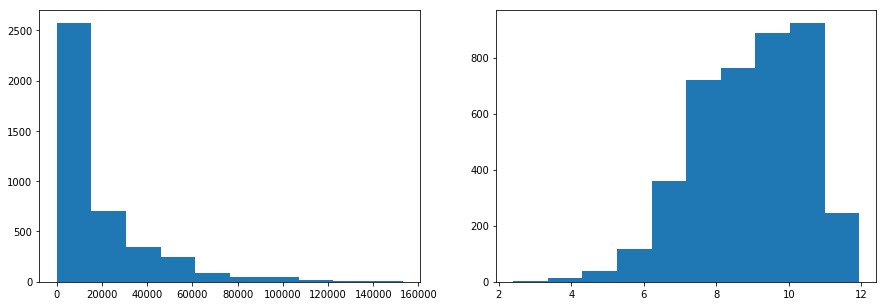

In [46]:
plt.figure(1, figsize = (15,5))
plt.subplot(121)
plt.hist(data[data["HouseholdIncome"] > 0]["HouseholdIncome"])

plt.subplot(122)
plt.hist(data[data["lnHouseholdIncome"] > 0]["lnHouseholdIncome"])

#### 4.2.2. Log transformation of Hospital expense

In [47]:
data["lnHosptialExpense"] = data["HosptialExpense"].apply(np.log1p)

(array([  2.,  11.,  35.,  63., 189., 195., 217.,  67.,  40.,  14.]),
 array([ 3.71357207,  4.5117404 ,  5.30990872,  6.10807705,  6.90624538,
         7.70441371,  8.50258204,  9.30075037, 10.0989187 , 10.89708703,
        11.69525536]),
 <a list of 10 Patch objects>)

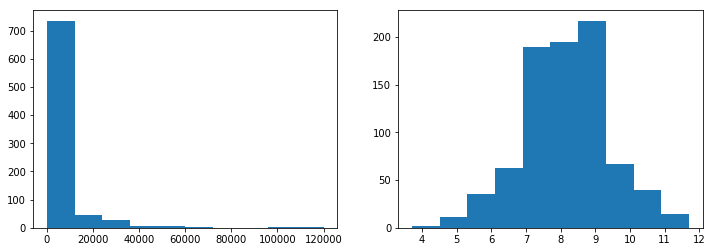

In [48]:
plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.hist(data[data["HosptialExpense"] > 0]["HosptialExpense"])

plt.subplot(122)
plt.hist(data[data["lnHosptialExpense"] > 0]["lnHosptialExpense"])

In [49]:
data = data.drop(['HosptialExpense','HouseholdIncome'],axis = 1)
data.shape

(7286, 37)

In [50]:
# to store for the further iteration 
data.to_csv("data_iteration5.csv")
data = data.drop(['IncomePer','IADL','PADL','HospitalFreq','medtc','ChronicDiseases'], axis = 1)

In [51]:
# save clean data for data mining
data.to_csv("clean_data.csv")

In [52]:
# save data for further iteration
# subset of lower-aged elderly
lower_aged = data.loc[data["Age"] < 80]
lower_aged.to_csv("iteration4_lower_aged.csv")
# subset of higher-aged elderly
higher_aged = data.loc[data["Age"] >= 80]
higher_aged.to_csv("iteration4_higher_aged.csv")

# 7. Data Mining

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./clean_data.csv", index_col = "ID")

In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('data_mining').getOrCreate()

In [4]:
data_spark = spark.createDataFrame(data)
data_spark.printSchema()

root
 |-- Edu: double (nullable = true)
 |-- Marriage: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- Hypertension: double (nullable = true)
 |-- Dyslipidemia: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- Cancer/Tumor: double (nullable = true)
 |-- ChronicLungDiseases: double (nullable = true)
 |-- LiverDisease: double (nullable = true)
 |-- HeartProblems: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- KidneyDisease: double (nullable = true)
 |-- DigestiveDisease: double (nullable = true)
 |-- PsychiatricProblems: double (nullable = true)
 |-- Memory-RelatedDisease: double (nullable = true)
 |-- ArthritisorRheumatism: double (nullable = true)
 |-- Asthma: double (nullable = true)
 |-- Hospital: double (nullable = true)
 |-- Job: double (nullable = true)
 |-- Pension: double (nullable = true)
 |-- Rural: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Self-assessedHealth: double (nullable = true)
 |-- Me

## 7.1. Test Design and Justification

In [5]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=['Edu', 'ClinicFreq', 'ADL', 'Marriage', 'Gender', 'Dyslipidemia', 'Diabetes',
       'Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease', 'HeartProblems',
       'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems',
       'Memory-RelatedDisease', 'ArthritisorRheumatism', 'Asthma', 'Hospital',
       'Job', 'Pension', 'Rural', 'Age', 'Self-assessedHealth', 'MentalHealth',
       'ChildrenNum', 'Colive', 'Province','lnHouseholdIncome', 'lnHosptialExpense'],
    outputCol="features")
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(data_spark)
# Using print schema, you see that the features output column has been added. 
output.printSchema()

root
 |-- Edu: double (nullable = true)
 |-- Marriage: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- Hypertension: double (nullable = true)
 |-- Dyslipidemia: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- Cancer/Tumor: double (nullable = true)
 |-- ChronicLungDiseases: double (nullable = true)
 |-- LiverDisease: double (nullable = true)
 |-- HeartProblems: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- KidneyDisease: double (nullable = true)
 |-- DigestiveDisease: double (nullable = true)
 |-- PsychiatricProblems: double (nullable = true)
 |-- Memory-RelatedDisease: double (nullable = true)
 |-- ArthritisorRheumatism: double (nullable = true)
 |-- Asthma: double (nullable = true)
 |-- Hospital: double (nullable = true)
 |-- Job: double (nullable = true)
 |-- Pension: double (nullable = true)
 |-- Rural: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Self-assessedHealth: double (nullable = true)
 |-- Me

In [6]:
# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

[Row(Edu=1.0, Marriage=1.0, Gender=1.0, Hypertension=0.0, Dyslipidemia=0.0, Diabetes=1.0, Cancer/Tumor=0.0, ChronicLungDiseases=0.0, LiverDisease=0.0, HeartProblems=0.0, Stroke=0.0, KidneyDisease=0.0, DigestiveDisease=0.0, PsychiatricProblems=0.0, Memory-RelatedDisease=0.0, ArthritisorRheumatism=1.0, Asthma=0.0, Hospital=0.0, Job=0.0, Pension=0.0, Rural=1.0, Age=66.0, Self-assessedHealth=0.0, MentalHealth=12.0, ChildrenNum=1, Colive=1, Province=2, ClinicFreq=0.0, ADL=11, lnHouseholdIncome=8.517393171418902, lnHosptialExpense=0.0, features=SparseVector(30, {0: 1.0, 2: 11.0, 3: 1.0, 4: 1.0, 6: 1.0, 16: 1.0, 21: 1.0, 22: 66.0, 24: 12.0, 25: 1.0, 26: 1.0, 27: 2.0, 28: 8.5174}))]

In [7]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'Hypertension')
final_data.show()

+--------------------+------------+
|            features|Hypertension|
+--------------------+------------+
|(30,[0,2,3,4,6,16...|         0.0|
|(30,[0,2,3,4,21,2...|         0.0|
|(30,[0,2,3,21,22,...|         0.0|
|(30,[2,3,10,13,16...|         0.0|
|(30,[1,2,3,4,16,2...|         0.0|
|(30,[0,2,3,4,21,2...|         0.0|
|(30,[2,3,4,21,22,...|         0.0|
|(30,[0,2,3,4,16,2...|         1.0|
|(30,[0,2,3,4,21,2...|         0.0|
|(30,[0,2,3,4,21,2...|         0.0|
|(30,[1,2,3,16,21,...|         0.0|
|(30,[2,12,16,22,2...|         1.0|
|(30,[0,2,3,4,22,2...|         0.0|
|(30,[0,1,2,3,4,11...|         1.0|
|(30,[0,2,3,4,19,2...|         1.0|
|(30,[2,3,4,12,16,...|         0.0|
|(30,[0,1,2,3,4,12...|         0.0|
|(30,[0,2,3,22,23,...|         0.0|
|(30,[2,5,6,16,22,...|         1.0|
|(30,[0,2,3,5,10,1...|         1.0|
+--------------------+------------+
only showing top 20 rows



In [8]:
# Let's do a randomised 70/30 split. 
train_data,test_data = final_data.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------+
|summary|       Hypertension|
+-------+-------------------+
|  count|               5163|
|   mean|0.31841952353282976|
| stddev|0.46590833225300066|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+-------------------+
|summary|       Hypertension|
+-------+-------------------+
|  count|               2123|
|   mean|0.32736693358455016|
| stddev|  0.469362965500055|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



## 7.2. Data Mining Conduction

### 7.2.1. Logistic Regression

In [9]:
from pyspark.ml.classification import LogisticRegression

# Instance of logistic regression model. 
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

# Fit the model. Note that the train/test split isn't part of the documentation example.
lr_train = lr.fit(train_data)

lr_train_summary = lr_train.summary

# Raw prediction and probability have to do with logistic regression. 
# As with other models, we simply want to compare the label (actual) to the prediction.
lr_train_summary.predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Hypertension: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [10]:
# Label and prediction are stacked on each other. 
lr_train_summary.predictions.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|Hypertension|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(30,[0,1,2,3,4,5,...|         1.0|[-1.3374133649021...|[0.20793575158215...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|[-1.4929647488130...|[0.18347715178709...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[-1.1149736318153...|[0.24694481305458...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[-2.0670657592526...|[0.11233930599586...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[-1.3947708763432...|[0.19864720575855...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[-0.7084689841373...|[0.32993722694465...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|[-0.9118497906153...|[0.28662146206243...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[-0.8570960007020...|[0.29794643119407...|       1.0|
|(30,[0,1,2,3,4,5,...

In [11]:
# Evaluation of Logistic Regression Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                          labelCol='Hypertension')
lr_pred = lr_train.transform(test_data)
auc = evaluator.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

AUC of Logistic Regression Model: 0.5930818370513673


In [12]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension", 
                                              predictionCol="prediction", 
                                              metricName="accuracy")
acc = evaluator.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

Accuracy of Logistic Regression Model: 0.708431


In [13]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes','Cancer/Tumor', 
                'ChronicLungDiseases', 'LiverDisease', 'HeartProblems', 'Stroke', 
                'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems', 
                'Memory-RelatedDisease', 'ArthritisorRheumatism', 'Asthma', 
                'Hospital', 'Job', 'Pension', 'Rural', 'Age', 'Self-assessedHealth', 
                'MentalHealth', 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq',
                'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']
# Feature imortance
lr_importance = lr_train.coefficients
# summarize feature importance
[*zip(feature_name,lr_importance)]

[('Edu', -0.054400707303233715),
 ('Marriage', -0.018005692204493964),
 ('Gender', 0.02787794855491234),
 ('Dyslipidemia', -0.0761728525317528),
 ('Diabetes', -0.13668058785411497),
 ('Cancer/Tumor', 1.0318587215470512),
 ('ChronicLungDiseases', 0.7210413621183009),
 ('LiverDisease', 0.12451979417746666),
 ('HeartProblems', -0.14907517382151944),
 ('Stroke', -0.06328506783870132),
 ('KidneyDisease', 0.8404534855553943),
 ('DigestiveDisease', 1.0688674341430282),
 ('PsychiatricProblems', -0.010797276302048575),
 ('Memory-RelatedDisease', -0.21073580418873003),
 ('ArthritisorRheumatism', 0.07032129840710473),
 ('Asthma', -0.022416788116455734),
 ('Hospital', 0.12438895941522585),
 ('Job', -0.027716224117909253),
 ('Pension', 0.4560791224918561),
 ('Rural', 0.11925256922210431),
 ('Age', 0.2068353829207403),
 ('Self-assessedHealth', -0.22818412376604744),
 ('MentalHealth', 0.006499403299301325),
 ('ChildrenNum', -0.28724447166570827),
 ('Colive', -0.011710336217808103),
 ('Province', -0.0

([<matplotlib.axis.XTick at 0x7f82bfc145f8>,
 <a list of 30 Text xticklabel objects>)

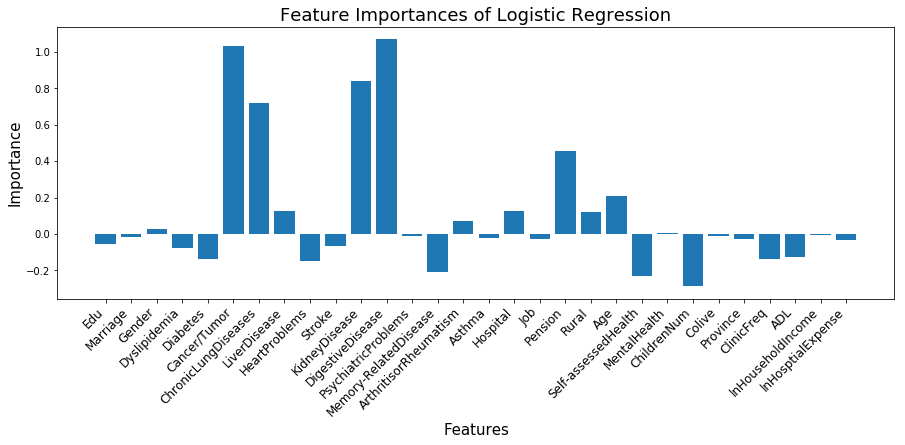

In [14]:
# visulization of feature importance
plt.figure(1, figsize = (15,5))
plt.bar(range(len(lr_importance)), lr_importance)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.title("Feature Importances of Logistic Regression",fontsize=18)
plt.xticks(range(len(lr_importance)),feature_name, rotation=45, 
           horizontalalignment='right', fontsize=12)

### 7.2.2. Decision Tree

In [15]:
from pyspark.ml.classification import DecisionTreeClassifier

# Instance of Decision Tree model
dt = DecisionTreeClassifier(labelCol="Hypertension", featuresCol="features")
# Train the model
model_dt = dt.fit(train_data)
# Make predictions
prediction_dt = model_dt.transform(test_data)
prediction_dt.show()

+--------------------+------------+-------------+--------------------+----------+
|            features|Hypertension|rawPrediction|         probability|prediction|
+--------------------+------------+-------------+--------------------+----------+
|(30,[0,1,2,3,4,5,...|         1.0|  [26.0,10.0]|[0.72222222222222...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|  [47.0,65.0]|[0.41964285714285...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|    [0.0,6.0]|           [0.0,1.0]|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|  [29.0,57.0]|[0.33720930232558...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|  [26.0,10.0]|[0.72222222222222...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|  [26.0,10.0]|[0.72222222222222...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|  [29.0,57.0]|[0.33720930232558...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|    [0.0,3.0]|           [0.0,1.0]|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|    [0.0,6.0]|           [0.0,1.0]|       1.0|
|(30,[0,1,2,3,4,

In [16]:
# Select example rows to display
prediction_dt.select("prediction", "Hypertension", "features").show(5)

+----------+------------+--------------------+
|prediction|Hypertension|            features|
+----------+------------+--------------------+
|       0.0|         1.0|(30,[0,1,2,3,4,5,...|
|       1.0|         0.0|(30,[0,1,2,3,4,5,...|
|       1.0|         1.0|(30,[0,1,2,3,4,5,...|
|       1.0|         1.0|(30,[0,1,2,3,4,5,...|
|       0.0|         0.0|(30,[0,1,2,3,4,5,...|
+----------+------------+--------------------+
only showing top 5 rows



In [17]:
# Select (prediction, true label) and compute test error
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension", 
                                              predictionCol="prediction", 
                                              metricName="accuracy")

accuracy = evaluator.evaluate(prediction_dt)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.699482
Test Error = 0.300518


In [18]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes',
                'Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
                'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 
                'PsychiatricProblems', 'Memory-RelatedDisease', 'ArthritisorRheumatism',
                'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Age', 
                'Self-assessedHealth', 'MentalHealth', 'ChildrenNum', 'Colive', 
                'Province', 'ClinicFreq', 'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']
# Feature imortance
dt_importance = model_dt.featureImportances
# summarize feature importance
[*zip(feature_name,dt_importance)]

[('Edu', 0.0031917838113516305),
 ('Marriage', 0.008292552898654904),
 ('Gender', 0.08396737176788527),
 ('Dyslipidemia', 0.0),
 ('Diabetes', 0.0),
 ('Cancer/Tumor', 0.3616731264732598),
 ('ChronicLungDiseases', 0.06944553387208567),
 ('LiverDisease', 0.0),
 ('HeartProblems', 0.0),
 ('Stroke', 0.004107774994969659),
 ('KidneyDisease', 0.20835603456569401),
 ('DigestiveDisease', 0.11414408780249198),
 ('PsychiatricProblems', 0.01412055002736373),
 ('Memory-RelatedDisease', 0.0),
 ('ArthritisorRheumatism', 0.0),
 ('Asthma', 0.011308786948057184),
 ('Hospital', 0.0),
 ('Job', 0.009303503432479036),
 ('Pension', 0.0),
 ('Rural', 0.012346623998215794),
 ('Age', 0.0),
 ('Self-assessedHealth', 0.0),
 ('MentalHealth', 0.013574969627401767),
 ('ChildrenNum', 0.01053035775994122),
 ('Colive', 0.028325582208539663),
 ('Province', 0.0),
 ('ClinicFreq', 0.0),
 ('ADL', 0.020132540333323054),
 ('lnHouseholdIncome', 0.019444493642079078),
 ('lnHosptialExpense', 0.007734325836206591)]

([<matplotlib.axis.XTick at 0x7f82bfdce198>,
 <a list of 30 Text xticklabel objects>)

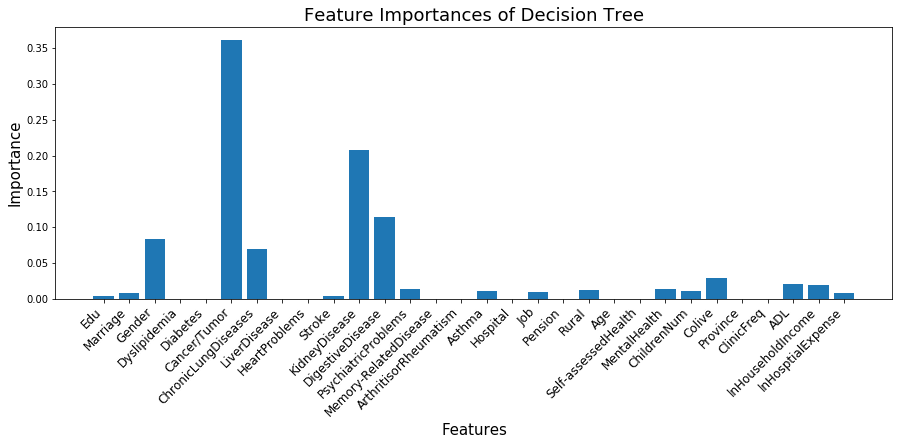

In [19]:
# visulization of feature importance
plt.figure(1, figsize = (15,5))
plt.bar(range(len(model_dt.featureImportances)), model_dt.featureImportances)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.title("Feature Importances of Decision Tree",fontsize=18)
plt.xticks(range(len(lr_importance)),feature_name, rotation=45, horizontalalignment='right', fontsize=12)

### 7.2.3. Random Forest

In [20]:
from pyspark.ml.classification import RandomForestClassifier

# Instance of Random Forest model
rf = RandomForestClassifier(labelCol="Hypertension", featuresCol="features", numTrees=20)
# Train the model
model_rf = rf.fit(train_data)
# Make predictions
prediction_rf = model_rf.transform(test_data)
prediction_rf.show()

+--------------------+------------+--------------------+--------------------+----------+
|            features|Hypertension|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(30,[0,1,2,3,4,5,...|         1.0|[9.21892324022459...|[0.46094616201122...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|[6.48311454919708...|[0.32415572745985...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[7.64480889779244...|[0.38224044488962...|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|[10.9065316985570...|[0.54532658492785...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|[11.6151606446077...|[0.58075803223038...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|[12.2762601253532...|[0.61381300626766...|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|[9.57267171985475...|[0.47863358599273...|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|[12.5988847667431...|[0.62994423833715...|       0.0|
|(30,[0,1,2,3,4,5,...

In [21]:
# Select example rows to display
prediction_rf.select("prediction", "Hypertension", "features").show(5)

+----------+------------+--------------------+
|prediction|Hypertension|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(30,[0,1,2,3,4,5,...|
|       1.0|         0.0|(30,[0,1,2,3,4,5,...|
|       1.0|         1.0|(30,[0,1,2,3,4,5,...|
|       0.0|         1.0|(30,[0,1,2,3,4,5,...|
|       0.0|         0.0|(30,[0,1,2,3,4,5,...|
+----------+------------+--------------------+
only showing top 5 rows



In [22]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension", predictionCol="prediction", metricName="accuracy")
# A test error of zero means that the model accuracy is at 100% 
# In most cases this is unrealistic, but here it's correct due to the simple data used in the documentation
accuracy = evaluator.evaluate(prediction_rf)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.701366
Test Error = 0.298634


In [23]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes','Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
 'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems', 'Memory-RelatedDisease',
 'ArthritisorRheumatism', 'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Age', 'Self-assessedHealth', 'MentalHealth',
 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq', 'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']
# Feature imortance
dt_importance = model_dt.featureImportances
# summarize feature importance
[*zip(feature_name,dt_importance)]

[('Edu', 0.0031917838113516305),
 ('Marriage', 0.008292552898654904),
 ('Gender', 0.08396737176788527),
 ('Dyslipidemia', 0.0),
 ('Diabetes', 0.0),
 ('Cancer/Tumor', 0.3616731264732598),
 ('ChronicLungDiseases', 0.06944553387208567),
 ('LiverDisease', 0.0),
 ('HeartProblems', 0.0),
 ('Stroke', 0.004107774994969659),
 ('KidneyDisease', 0.20835603456569401),
 ('DigestiveDisease', 0.11414408780249198),
 ('PsychiatricProblems', 0.01412055002736373),
 ('Memory-RelatedDisease', 0.0),
 ('ArthritisorRheumatism', 0.0),
 ('Asthma', 0.011308786948057184),
 ('Hospital', 0.0),
 ('Job', 0.009303503432479036),
 ('Pension', 0.0),
 ('Rural', 0.012346623998215794),
 ('Age', 0.0),
 ('Self-assessedHealth', 0.0),
 ('MentalHealth', 0.013574969627401767),
 ('ChildrenNum', 0.01053035775994122),
 ('Colive', 0.028325582208539663),
 ('Province', 0.0),
 ('ClinicFreq', 0.0),
 ('ADL', 0.020132540333323054),
 ('lnHouseholdIncome', 0.019444493642079078),
 ('lnHosptialExpense', 0.007734325836206591)]

([<matplotlib.axis.XTick at 0x7f82bef08240>,
 <a list of 30 Text xticklabel objects>)

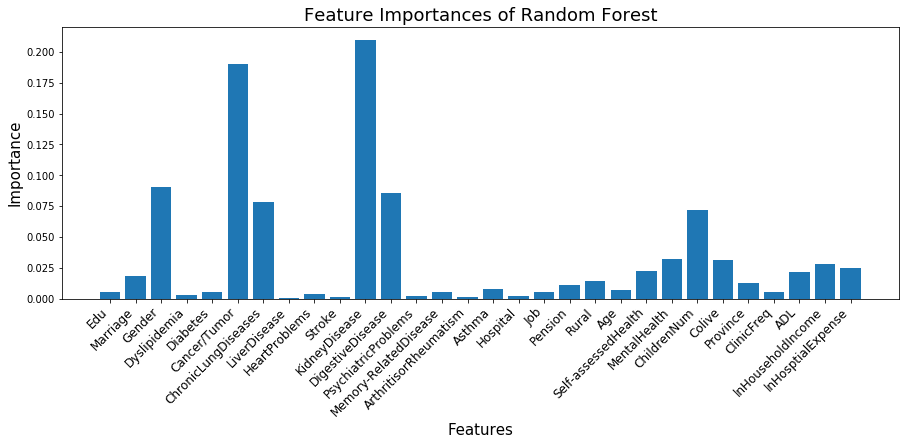

In [24]:
# visulization of feature importance
plt.figure(1, figsize = (15,5))
plt.bar(range(len(model_rf.featureImportances)), model_rf.featureImportances)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.title("Feature Importances of Random Forest",fontsize=18)
plt.xticks(range(len(model_rf.featureImportances)),feature_name, rotation=45, horizontalalignment='right', fontsize=12)

### 7.2.4. Gradient Boosted Tree

In [25]:
from pyspark.ml.classification import GBTClassifier

# Instance of GBT model
gbt = GBTClassifier(labelCol="Hypertension", featuresCol="features", maxIter=10)

# Train the model
model_gbt = gbt.fit(train_data)

In [26]:
# Make predictions
prediction_gbt = model_gbt.transform(test_data)
prediction_gbt.show()

# Select example rows to display
prediction_gbt.select("prediction", "Hypertension", "features").show(5)

+--------------------+------------+----------+
|            features|Hypertension|prediction|
+--------------------+------------+----------+
|(30,[0,1,2,3,4,5,...|         1.0|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|       0.0|
|(30,[0,1,2,3,4,5,...|         0.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       0.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       1.0|
|(30,[0,1,2,3,4,5,...|         0.0|       1.0|
|(30,[0,1,2,3,4,5,...|         1.0|       0.0|
|(30,[0,1,2,3

In [27]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction_gbt)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.702779
Test Error = 0.297221


([<matplotlib.axis.XTick at 0x7f82beef5f28>,
 <a list of 30 Text xticklabel objects>)

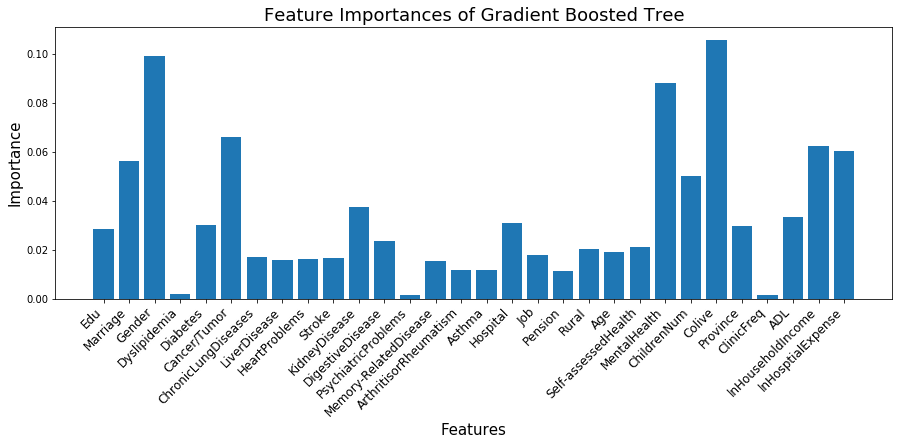

In [28]:
# visulization of feature importance
plt.figure(1, figsize = (15,5))
plt.bar(range(len(model_gbt.featureImportances)), model_gbt.featureImportances)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.title("Feature Importances of Gradient Boosted Tree",fontsize=18)
plt.xticks(range(len(model_gbt.featureImportances)),feature_name, rotation=45, horizontalalignment='right', fontsize=12)

## 7.2.5. Comparison among different algorithms

In [29]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

# Use defaults to make the comparison "fair". 
lr  = LogisticRegression(labelCol='Hypertension',featuresCol='features')
dtc = DecisionTreeClassifier(labelCol='Hypertension',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Hypertension',featuresCol='features')
gbt = GBTClassifier(labelCol='Hypertension',featuresCol='features')

# Train the models 
lr_model = lr.fit(train_data)
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

# Model Comparison
lr_predictions = lr_model.transform(test_data)
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [30]:
# Evaluation Matrix
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Hypertension')

print("Comparison of AUC among different Tree Models: ")

# This is the area under the curve. 
#This indicates that the data is highly seperable.
print("Logistic Regression Model: "+ 
      str(my_binary_eval.evaluate(lr_predictions)))

print("Decision Tree Classifier: "+ 
      str(my_binary_eval.evaluate(dtc_predictions)))

# RFC improves accuracy but also model complexity. 
#RFC outperforms DTC in nearly every situation.
print("Random Forest Classifier: " + 
      str(my_binary_eval.evaluate(rfc_predictions)))

# We can't repeat these exact steps for GBT. 
# Instead, let's redefine the object:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='Hypertension',
                                       rawPredictionCol='prediction')
print("Gradient Boosted Tree: " + 
      str(my_binary_gbt_eval.evaluate(gbt_predictions)))

Comparison of AUC among different Tree Models: 
Logistic Regression Model: 0.6947897144469285
Decision Tree Classifier: 0.3473852850492715
Random Forest Classifier: 0.6850054410253322
Gradient Boosted Tree: 0.5978387038268546


In [31]:
# Even though we're just doing binary classification, 
# we can use the multi-class classification evaluator.
# Because then we can test precision, accuracy and recall directly. 
# import the evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension",
                    predictionCol="prediction", metricName="accuracy")
lr_acc = acc_evaluator.evaluate(lr_predictions)
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [32]:
# formatted printing 
print("Comparison of Accurancy Rate among different Models:")
print()
print('A logistic regression model has an accuracy of: {0:2.2f}%'.format(lr_acc*100))
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Comparison of Accurancy Rate among different Models:

A logistic regression model has an accuracy of: 70.84%
A single decision tree has an accuracy of: 69.95%
A random forest ensemble has an accuracy of: 70.14%
An ensemble using GBT has an accuracy of: 70.04%


# 8. Interpretation

## 8.1. Mined Patterns Discussion

## 8.2. Data, Results and Patterns Visualization

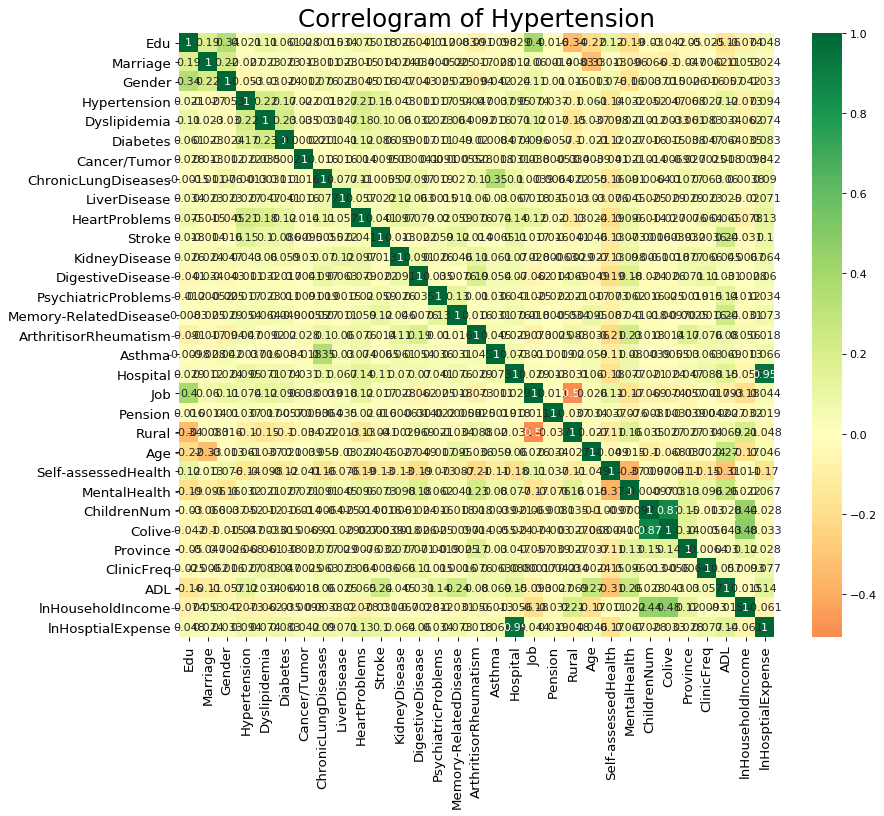

In [33]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, 
            yticklabels=data.corr().columns, cmap='RdYlGn', 
            center=0, annot=True)

# Decorations
plt.title('Correlogram of Hypertension', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
x = data.iloc[:,data.columns != "Hypertension"]
y = data.iloc[:,data.columns == "Hypertension"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr = LR(C=1., solver='liblinear',max_iter=3000)
lr.fit(x_train,y_train.values.ravel())
lr_pred = lr.predict_proba(x)
lr_pred 

array([[0.59092522, 0.40907478],
       [0.88226902, 0.11773098],
       [0.79654459, 0.20345541],
       ...,
       [0.8173056 , 0.1826944 ],
       [0.80731202, 0.19268798],
       [0.64055824, 0.35944176]])

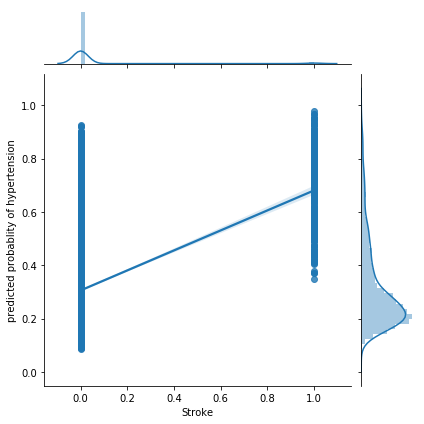

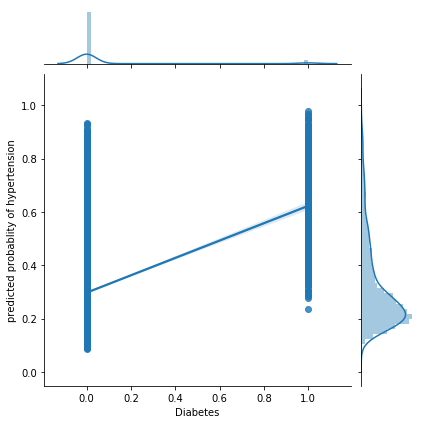

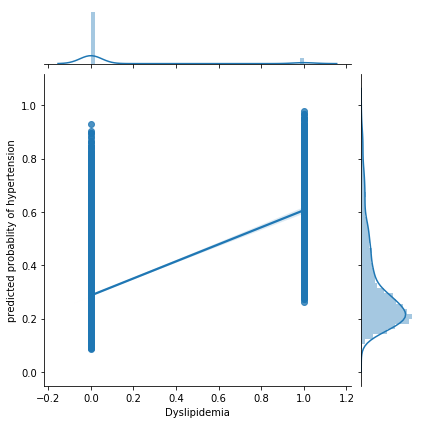

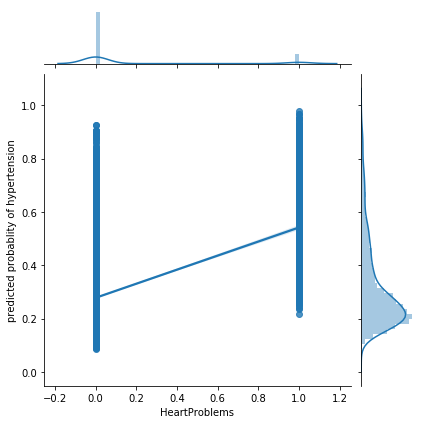

In [35]:
# Joint Plot for Important Features and Predicted Probability of Hypertension
data['predicted probablity of hypertension'] = lr_pred[:,1]
# `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
sns.jointplot(y="predicted probablity of hypertension", x="Stroke", data=data, kind='reg')
sns.jointplot(y="predicted probablity of hypertension", x="Diabetes", data=data, kind='reg')
sns.jointplot(y="predicted probablity of hypertension", x="Dyslipidemia", data=data, kind='reg')
sns.jointplot(y="predicted probablity of hypertension", x="HeartProblems", data=data, kind='reg')

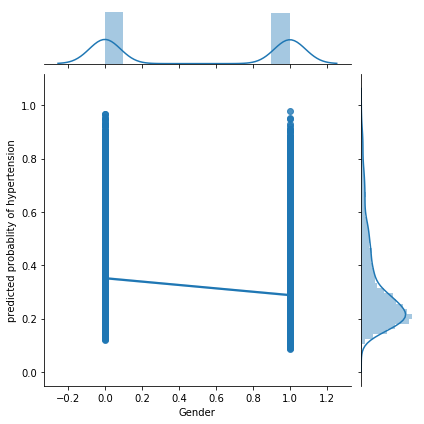

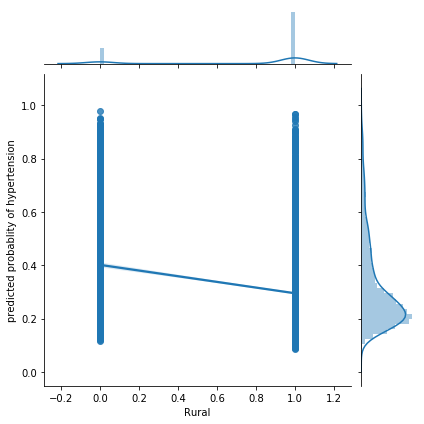

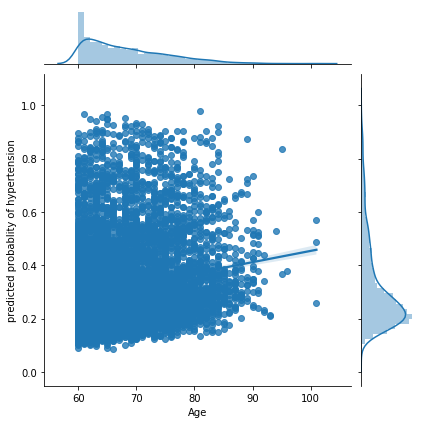

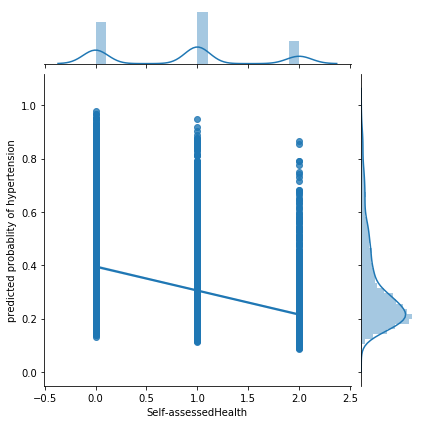

In [36]:
sns.jointplot(y="predicted probablity of hypertension", x="Gender", data=data, kind='reg')

sns.jointplot(y="predicted probablity of hypertension", x="Rural", data=data, kind='reg')

sns.jointplot(y="predicted probablity of hypertension", x="Age", data=data, kind='reg')

sns.jointplot(y="predicted probablity of hypertension", x="Self-assessedHealth", data=data, kind='reg')

In [37]:
data = data.drop(['predicted probablity of hypertension'], axis = 1)

## 8.3. Results, Models, and Patterns Interpretation

In [38]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instance of logistic regression model.
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

# Fit the model. 
lr_train = lr.fit(train_data)
lr_pred = lr_train.transform(test_data)

# auc
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='Hypertension')
auc = evaluator.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

# acc
evaluator = MulticlassClassificationEvaluator(labelCol="Hypertension", predictionCol="prediction", metricName="accuracy")
acc = evaluator.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes','Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
 'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems', 'Memory-RelatedDisease',
 'ArthritisorRheumatism', 'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Age', 'Self-assessedHealth', 'MentalHealth',
 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq', 'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']
# Feature imortance
lr_importance = lr_train.coefficients
# summarize feature importance
[*zip(feature_name,lr_importance)]

AUC of Logistic Regression Model: 0.5930818370513673
Accuracy of Logistic Regression Model: 0.708431


[('Edu', -0.054400707303233715),
 ('Marriage', -0.018005692204493964),
 ('Gender', 0.02787794855491234),
 ('Dyslipidemia', -0.0761728525317528),
 ('Diabetes', -0.13668058785411497),
 ('Cancer/Tumor', 1.0318587215470512),
 ('ChronicLungDiseases', 0.7210413621183009),
 ('LiverDisease', 0.12451979417746666),
 ('HeartProblems', -0.14907517382151944),
 ('Stroke', -0.06328506783870132),
 ('KidneyDisease', 0.8404534855553943),
 ('DigestiveDisease', 1.0688674341430282),
 ('PsychiatricProblems', -0.010797276302048575),
 ('Memory-RelatedDisease', -0.21073580418873003),
 ('ArthritisorRheumatism', 0.07032129840710473),
 ('Asthma', -0.022416788116455734),
 ('Hospital', 0.12438895941522585),
 ('Job', -0.027716224117909253),
 ('Pension', 0.4560791224918561),
 ('Rural', 0.11925256922210431),
 ('Age', 0.2068353829207403),
 ('Self-assessedHealth', -0.22818412376604744),
 ('MentalHealth', 0.006499403299301325),
 ('ChildrenNum', -0.28724447166570827),
 ('Colive', -0.011710336217808103),
 ('Province', -0.0

In [39]:
# coefficient Table from pyspark data mining 

import math
lr_coef = lr_train.coefficients.toArray()
lr_coef = pd.DataFrame(lr_coef)

feature_name = pd.DataFrame(feature_name)
feature_name

lr_result = pd.DataFrame(feature_name)

lr_result["coef"] = pd.DataFrame(lr_coef)
lr_result["e_coef"] = lr_result["coef"].apply(np.exp)
lr_result

,0,coef,e_coef
0,Edu,-0.054401,0.947053
1,Marriage,-0.018006,0.982155
2,Gender,0.027878,1.028270
3,Dyslipidemia,-0.076173,0.926656
4,Diabetes,-0.136681,0.872249
5,Cancer/Tumor,1.031859,2.806277
6,ChronicLungDiseases,0.721041,2.056574
7,LiverDisease,0.124520,1.132604
8,HeartProblems,-0.149075,0.861504
9,Stroke,-0.063285,0.938676


## 8.4. Results, Models, and Patterns Assessment and Evaluation

see step 7.3

## 8.5. Iteration of Prior Steps

### 8.5.3.Iteration 2 - Parameter Adjustment

In [40]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instance of logistic regression model. 
lr1 = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')
lr2 = LogisticRegression(regParam=1, maxIter=100, labelCol='Hypertension')
lr3 = LogisticRegression(regParam=0, maxIter=200, labelCol='Hypertension')

# Fit the model.
lr1 = lr2.fit(train_data)
lr2 = lr2.fit(train_data)
lr3 = lr3.fit(train_data)

# Make predictions
lr_pred1 = lr2.transform(test_data)
lr_pred2 = lr2.transform(test_data)
lr_pred3 = lr3.transform(test_data)

# Evaluation of Logistic Regression Model
evaluator_b = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                            labelCol='Hypertension')
lr_auc1 = evaluator_b.evaluate(lr_pred1)
print("AUC of Logistic Regression Model 1: " + str(lr_auc1))
lr_auc2 = evaluator_b.evaluate(lr_pred2)
print("AUC of Logistic Regression Model 2: " + str(lr_auc2))
lr_auc3 = evaluator_b.evaluate(lr_pred3)
print("AUC of Logistic Regression Model 3: " + str(lr_auc3))

evaluator_m = MulticlassClassificationEvaluator(labelCol="Hypertension", 
                                                predictionCol="prediction",
                                                metricName="accuracy")
lr_acc1 = evaluator_m.evaluate(lr_pred1)
print("Accuracy of Logistic Regression Model 1: %g" % (lr_acc1))
lr_acc2 = evaluator_m.evaluate(lr_pred2)
print("Accuracy of Logistic Regression Model 2: %g" % (lr_acc2))
lr_acc3 = evaluator_m.evaluate(lr_pred3)
print("Accuracy of Logistic Regression Model 3: %g" % (lr_acc3))

AUC of Logistic Regression Model 1: 0.5136882090965883
AUC of Logistic Regression Model 2: 0.5136882090965883
AUC of Logistic Regression Model 3: 0.5930818370513673
Accuracy of Logistic Regression Model 1: 0.681112
Accuracy of Logistic Regression Model 2: 0.681112
Accuracy of Logistic Regression Model 3: 0.708431


In [41]:
rf1 = RandomForestClassifier(numTrees=5, impurity='gini', labelCol='Hypertension')
rf2 = RandomForestClassifier(numTrees=10, impurity='gini', labelCol='Hypertension')
rf3 = RandomForestClassifier(numTrees=5, impurity='entropy', labelCol='Hypertension')

rf1 = rf1.fit(train_data)
rf2 = rf2.fit(train_data)
rf3 = rf3.fit(train_data)

rf_pred1 = rf1.transform(test_data)
rf_pred2 = rf2.transform(test_data)
rf_pred3 = rf3.transform(test_data)

# Evaluation of Random Forest Algorithm
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator_b = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                            labelCol='Hypertension')
rf_auc1 = evaluator_b.evaluate(rf_pred1)
print("AUC of Random Forest Algorithm 1: " + str(rf_auc1))
rf_auc2 = evaluator_b.evaluate(rf_pred2)
print("AUC of Random Forest Algorithm 2: " + str(rf_auc2))
rf_auc3 = evaluator_b.evaluate(rf_pred3)
print("AUC of Random Forest Algorithm 3: " + str(rf_auc3))


from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_m = MulticlassClassificationEvaluator(labelCol="Hypertension", 
             predictionCol="prediction", metricName="accuracy")
rf_acc1 = evaluator_m.evaluate(rf_pred1)
print("Accuracy of Random Forest Algorithm 1: %g" % (rf_acc1))
rf_acc2 = evaluator_m.evaluate(lr_pred2)
print("Accuracy of Random Forest Algorithm 2: %g" % (rf_acc2))
rf_acc3 = evaluator_m.evaluate(lr_pred3)
print("Accuracy of Random Forest Algorithm 3: %g" % (rf_acc3))

AUC of Random Forest Algorithm 1: 0.5792979062128448
AUC of Random Forest Algorithm 2: 0.5797684541442476
AUC of Random Forest Algorithm 3: 0.583576164278661
Accuracy of Random Forest Algorithm 1: 0.702308
Accuracy of Random Forest Algorithm 2: 0.681112
Accuracy of Random Forest Algorithm 3: 0.708431


### 8.5.2. Iteration 3 - Split ratio of test design change

In [42]:
# A randomised 80/20 split. 
train_data,test_data = final_data.randomSplit([0.8,0.2])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------+
|summary|       Hypertension|
+-------+-------------------+
|  count|               5810|
|   mean| 0.3197934595524957|
| stddev|0.46643654347389385|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+------------------+
|summary|      Hypertension|
+-------+------------------+
|  count|              1476|
|   mean|0.3258807588075881|
| stddev|0.4688618422604159|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+



In [43]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instance of logistic regression model. 
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

# Fit the model. 
lr_train = lr.fit(train_data)

lr_pred = lr_train.transform(test_data)

# Evaluation of Logistic Regression Model
evaluator_b = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                            labelCol='Hypertension')
auc = evaluator_b.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

evaluator_m = MulticlassClassificationEvaluator(labelCol="Hypertension", 
              predictionCol="prediction", metricName="accuracy")
acc = evaluator_m.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

AUC of Logistic Regression Model: 0.5982103866525977
Accuracy of Logistic Regression Model: 0.71748


In [44]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes','Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
 'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems', 'Memory-RelatedDisease',
 'ArthritisorRheumatism', 'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Age', 'Self-assessedHealth', 'MentalHealth',
 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq', 'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']
# Feature imortance
lr_importance = lr_train.coefficients
# summarize feature importance
[*zip(feature_name,lr_importance)]

[('Edu', 0.01587566406545242),
 ('Marriage', -0.022074883504366358),
 ('Gender', 0.026662268807820143),
 ('Dyslipidemia', -0.10218716283863177),
 ('Diabetes', -0.16510069299753916),
 ('Cancer/Tumor', 0.9740802748494496),
 ('ChronicLungDiseases', 0.797237191718357),
 ('LiverDisease', 0.048886968360718853),
 ('HeartProblems', -0.11357559519153654),
 ('Stroke', -0.041197618010737035),
 ('KidneyDisease', 0.8223630453255982),
 ('DigestiveDisease', 1.0360772588247216),
 ('PsychiatricProblems', 0.10341663846871015),
 ('Memory-RelatedDisease', -0.13118776914353783),
 ('ArthritisorRheumatism', -0.13840895007740192),
 ('Asthma', -0.14032619575692443),
 ('Hospital', 0.20146696498596744),
 ('Job', -0.18521196408460536),
 ('Pension', 0.40442762954405803),
 ('Rural', 0.07947810573923314),
 ('Age', 0.20760886374539955),
 ('Self-assessedHealth', -0.2662799444631271),
 ('MentalHealth', 0.008693780273582061),
 ('ChildrenNum', -0.24392809984979238),
 ('Colive', -0.006374812510593496),
 ('Province', -0.09

([<matplotlib.axis.XTick at 0x7f82bc03c160>,
 <a list of 30 Text xticklabel objects>)

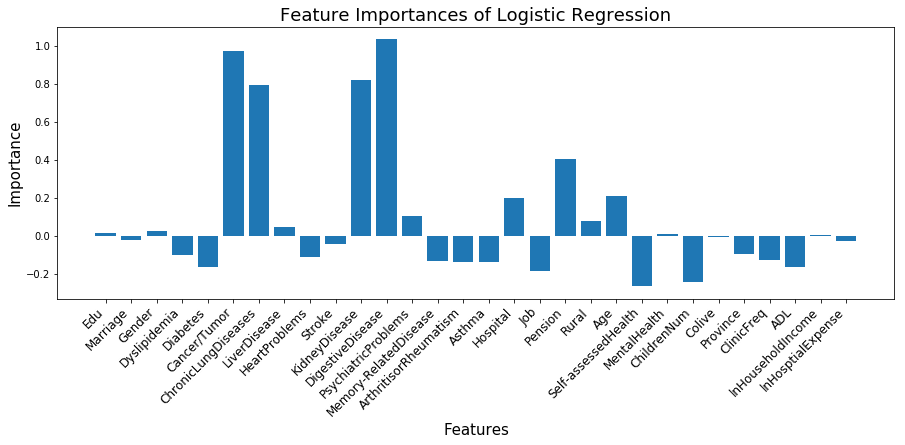

In [45]:
# visulization of feature importance
plt.figure(1, figsize = (15,5))
plt.bar(range(len(lr_importance)), lr_importance)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.title("Feature Importances of Logistic Regression",fontsize=18)
plt.xticks(range(len(lr_importance)),feature_name, rotation=45, horizontalalignment='right', fontsize=12)

### 8.5.3. Iteration 4 -- subset modelling

#### For the Lower-aged Old Subset

In [46]:
# data transform, drop the age variable 
data1 = pd.read_csv("./iteration4_lower_aged.csv")
data_spark = spark.createDataFrame(data1)

assembler = VectorAssembler(
    inputCols=['Edu', 'ClinicFreq', 'ADL', 'Marriage', 'Gender',
               'Dyslipidemia', 'Diabetes', 'Cancer/Tumor', 
               'ChronicLungDiseases', 'LiverDisease', 'HeartProblems',
               'Stroke', 'KidneyDisease', 'DigestiveDisease', 
               'PsychiatricProblems','Memory-RelatedDisease',
               'ArthritisorRheumatism', 'Asthma', 'Hospital',
               'Job', 'Pension', 'Rural',  'Self-assessedHealth', 
               'MentalHealth','ChildrenNum', 'Colive', 'Province',
               'lnHouseholdIncome', 'lnHosptialExpense'],
    outputCol="features")

output = assembler.transform(data_spark)

final_data = output.select("features",'Hypertension')

train_data,test_data = final_data.randomSplit([0.7,0.3])

# model run
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

lr_train = lr.fit(train_data)

lr_pred = lr_train.transform(test_data)

# evaluation
auc = evaluator_b.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

acc = evaluator_m.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

AUC of Logistic Regression Model: 0.5912367069214132
Accuracy of Logistic Regression Model: 0.708929


In [47]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes',
                'Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
                'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 
                'PsychiatricProblems', 'Memory-RelatedDisease', 'ArthritisorRheumatism', 
                'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Self-assessedHealth', 
                'MentalHealth','ChildrenNum', 'Colive', 'Province', 'ClinicFreq', 
                'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']

# coefficient Table 
import math
lr_coef = lr_train.coefficients.toArray()
lr_coef = pd.DataFrame(lr_coef)
feature_name = pd.DataFrame(feature_name)
lr_result = pd.DataFrame(feature_name)
lr_result["coef"] = pd.DataFrame(lr_coef)
lr_result["e_coef"] = lr_result["coef"].apply(np.exp)
lr_result

,0,coef,e_coef
0,Edu,-0.033335,0.967214
1,Marriage,-0.021190,0.979033
2,Gender,0.039232,1.040012
3,Dyslipidemia,-0.074547,0.928164
4,Diabetes,-0.126964,0.880765
5,Cancer/Tumor,1.051365,2.861554
6,ChronicLungDiseases,0.787996,2.198986
7,LiverDisease,-0.299450,0.741226
8,HeartProblems,-0.086754,0.916903
9,Stroke,0.193479,1.213464


#### For the Higher-aged Old Subset

In [48]:
# data transform
data2 = pd.read_csv("./iteration4_higher_aged.csv")
data_spark = spark.createDataFrame(data2)
assembler = VectorAssembler(
    inputCols=['Edu', 'ClinicFreq', 'ADL', 'Marriage', 'Gender', 
               'Dyslipidemia', 'Diabetes','Cancer/Tumor', 
               'ChronicLungDiseases', 'LiverDisease', 'HeartProblems',
               'Stroke', 'KidneyDisease', 'DigestiveDisease', 
               'PsychiatricProblems','Memory-RelatedDisease', 
               'ArthritisorRheumatism', 'Asthma', 'Hospital',
               'Job', 'Pension', 'Rural',  'Self-assessedHealth',
               'MentalHealth','ChildrenNum', 'Colive', 'Province',
               'lnHouseholdIncome', 'lnHosptialExpense'],
    outputCol="features")
output = assembler.transform(data_spark)

final_data = output.select("features",'Hypertension')

train_data,test_data = final_data.randomSplit([0.7,0.3])

# model run
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

lr_train = lr.fit(train_data)

lr_pred = lr_train.transform(test_data)

# evaluation
auc = evaluator_b.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

acc = evaluator_m.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

AUC of Logistic Regression Model: 0.6443903318903319
Accuracy of Logistic Regression Model: 0.729032


In [49]:
# Feature names
feature_name = ['Edu','Marriage','Gender','Dyslipidemia','Diabetes','Cancer/Tumor', 'ChronicLungDiseases', 'LiverDisease',
 'HeartProblems', 'Stroke', 'KidneyDisease', 'DigestiveDisease', 'PsychiatricProblems', 'Memory-RelatedDisease',
 'ArthritisorRheumatism', 'Asthma', 'Hospital', 'Job', 'Pension', 'Rural', 'Self-assessedHealth', 'MentalHealth',
 'ChildrenNum', 'Colive', 'Province', 'ClinicFreq', 'ADL', 'lnHouseholdIncome', 'lnHosptialExpense']

# coefficient Table 
import math
lr_coef = lr_train.coefficients.toArray()
lr_coef = pd.DataFrame(lr_coef)
feature_name = pd.DataFrame(feature_name)
lr_result = pd.DataFrame(feature_name)
lr_result["coef"] = pd.DataFrame(lr_coef)
lr_result["e_coef"] = lr_result["coef"].apply(np.exp)
lr_result

,0,coef,e_coef
0,Edu,0.177869,1.194669
1,Marriage,-0.031918,0.968586
2,Gender,0.010001,1.010052
3,Dyslipidemia,-0.203351,0.815991
4,Diabetes,-0.944732,0.388784
5,Cancer/Tumor,1.100170,3.004677
6,ChronicLungDiseases,0.999478,2.716863
7,LiverDisease,11.066741,64006.597615
8,HeartProblems,-0.342695,0.709855
9,Stroke,-0.563894,0.568989


### 8.5.4. Iteration 5 - Variable Replacement

In [50]:
# data transform
data3 = pd.read_csv("./data_iteration5.csv")
data3 = data3.drop(['IncomePer','ADL','HospitalFreq','Hospital',
                    'medtc','ChronicDiseases'], axis = 1)
data_spark = spark.createDataFrame(data3)

assembler = VectorAssembler(
    inputCols=['Edu', 'Marriage', 'Gender', 'Dyslipidemia', 'Diabetes', 
               'Cancer/Tumor', 'LiverDisease', 'HeartProblems', 'Stroke', 
               'KidneyDisease','DigestiveDisease', 'PsychiatricProblems',
               'Memory-RelatedDisease','ArthritisorRheumatism', 'Asthma', 
               'Job','Pension', 'Rural', 'Age', 'Self-assessedHealth', 
               'PADL','IADL','MentalHealth', 'ChildrenNum', 'Colive', 
               'Province','ClinicFreq', 'lnHouseholdIncome', 
               'lnHosptialExpense'],
    outputCol="features")

output = assembler.transform(data_spark)

final_data = output.select("features",'Hypertension')

train_data,test_data = final_data.randomSplit([0.7,0.3])

# model run
lr = LogisticRegression(regParam=0, maxIter=100, labelCol='Hypertension')

lr_train = lr.fit(train_data)

lr_pred = lr_train.transform(test_data)

# Evaluation
auc = evaluator_b.evaluate(lr_pred)
print("AUC of Logistic Regression Model: " + str(auc))

acc = evaluator_m.evaluate(lr_pred)
print("Accuracy of Logistic Regression Model: %g" % (acc))

AUC of Logistic Regression Model: 0.6103756184936244
Accuracy of Logistic Regression Model: 0.724138


In [51]:
# Feature names
feature_name = ['Edu', 'Marriage', 'Gender',  'Dyslipidemia', 'Diabetes', 'Cancer/Tumor', 
               'LiverDisease', 'HeartProblems', 'Stroke', 'KidneyDisease','DigestiveDisease', 
               'PsychiatricProblems', 'Memory-RelatedDisease','ArthritisorRheumatism', 'Asthma', 
               'Job','Pension', 'Rural', 'Age', 'Self-assessedHealth', 'PADL','IADL','MentalHealth', 
               'ChildrenNum', 'Colive', 'Province','ClinicFreq', 'lnHouseholdIncome', 'lnHosptialExpense']

# coefficient Table 
import math
lr_coef = lr_train.coefficients.toArray()
lr_coef = pd.DataFrame(lr_coef)
feature_name = pd.DataFrame(feature_name)
lr_result = pd.DataFrame(feature_name)
lr_result["coef"] = pd.DataFrame(lr_coef)
lr_result["e_coef"] = lr_result["coef"].apply(np.exp)
lr_result

,0,coef,e_coef
0,Edu,-0.020165,0.980037
1,Marriage,-0.118245,0.888478
2,Gender,-0.118065,0.888639
3,Dyslipidemia,1.019027,2.770498
4,Diabetes,0.872534,2.392967
5,Cancer/Tumor,-0.165347,0.847600
6,LiverDisease,0.019003,1.019184
7,HeartProblems,0.838458,2.312799
8,Stroke,0.952377,2.591863
9,KidneyDisease,0.108213,1.114285
